In [3]:
## We are importing the libraries: numpy (scientific computing) and matplotlib (plotting)
import numpy as np
import matplotlib.pyplot as plt

In [4]:
# This will generate the same data everytime the code is executed. 
np.random.seed(0)  # For reproducibility

**np.random.seed(0)** sets the seed for the random number generator in NumPy to 0, ensuring that the random numbers generated afterward will be the same every time we run the program. This makes sure that the code is initialized the same way every single time. 

In [5]:
# Dogs: higher ear flappiness index, lower whisker length
dogs_whisker_length = np.random.normal(loc=5, scale=1, size=10)
dogs_ear_flappiness_index = np.random.normal(loc=8, scale=1, size=10)

This line of code generates an array of 10 random numbers that follow a normal (Gaussian) distribution using NumPy's **random.normal** function. 

Let's break down the parameters:

1. loc=5: This specifies the mean (average) of the distribution. In this case, the mean whisker length of the dogs is set to 5 units.

1. scale=1: This parameter defines the standard deviation of the distribution, which determines the spread of the values around the mean. A scale of 1 indicates that the whisker lengths will vary around the mean with a standard deviation of 1 unit.

1. size=10: This specifies the number of random values to generate. In this case, it's set to 10, so the resulting array will contain 10 random values.

In [6]:
dogs_whisker_length

array([6.76405235, 5.40015721, 5.97873798, 7.2408932 , 6.86755799,
       4.02272212, 5.95008842, 4.84864279, 4.89678115, 5.4105985 ])

In [7]:
dogs_ear_flappiness_index

array([8.14404357, 9.45427351, 8.76103773, 8.12167502, 8.44386323,
       8.33367433, 9.49407907, 7.79484174, 8.3130677 , 7.14590426])

In [8]:
# Cats: lower ear flappiness index, higher whisker length
cats_whisker_length = np.random.normal(loc=8, scale=1, size=10)
cats_ear_flappiness_index = np.random.normal(loc=5, scale=1, size=10)


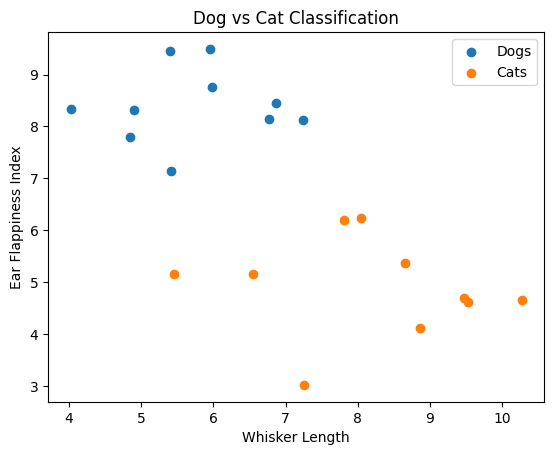

In [9]:
# Plot the data points
plt.scatter(dogs_whisker_length, dogs_ear_flappiness_index, label='Dogs')
plt.scatter(cats_whisker_length, cats_ear_flappiness_index, label='Cats')
plt.xlabel('Whisker Length')
plt.ylabel('Ear Flappiness Index')
plt.title('Dog vs Cat Classification')
plt.legend()
plt.show()

In [10]:
# Implementing random linear classifier algorithm
def random_linear_classifier(data_dogs, data_cats, k, d):  # k-number of choices (in this case, 100)
    # d is the number of features (ear flappiness index and whisker length) 
    best_error = float('inf')
    best_theta = None
    best_theta0 = None
    
    for _ in range(k):
        theta = np.random.normal(size=d)
        theta0 = np.random.normal()
        
        error = compute_error(data_dogs, data_cats, theta, theta0)
        
        if error < best_error:  # In each iteration, if error is lesser than than the previous one. New iteration is chosen. 
            best_error = error
            best_theta = theta
            best_theta0 = theta0
    
    return best_theta, best_theta0

In [11]:
def compute_error(data_dogs, data_cats, theta, theta0):
    error = 0
    for x_dog in data_dogs:
        if np.dot(theta, x_dog) + theta0 <= 0:  # dog data should be +1
            error += 1
    for x_cat in data_cats:
        if np.dot(theta, x_cat) + theta0 > 0:  # cat data should be -1
            error += 1
    return error

In [12]:
# Prepare data for algorithm
dogs_data = np.vstack((dogs_whisker_length, dogs_ear_flappiness_index)).T
cats_data = np.vstack((cats_whisker_length, cats_ear_flappiness_index)).T

In [13]:
dogs_data

array([[6.76405235, 8.14404357],
       [5.40015721, 9.45427351],
       [5.97873798, 8.76103773],
       [7.2408932 , 8.12167502],
       [6.86755799, 8.44386323],
       [4.02272212, 8.33367433],
       [5.95008842, 9.49407907],
       [4.84864279, 7.79484174],
       [4.89678115, 8.3130677 ],
       [5.4105985 , 7.14590426]])

In [14]:
cats_data

array([[ 5.44701018,  5.15494743],
       [ 8.6536186 ,  5.37816252],
       [ 8.8644362 ,  4.11221425],
       [ 7.25783498,  3.01920353],
       [10.26975462,  4.65208785],
       [ 6.54563433,  5.15634897],
       [ 8.04575852,  6.23029068],
       [ 7.81281615,  6.20237985],
       [ 9.53277921,  4.61267318],
       [ 9.46935877,  4.69769725]])

In [43]:
# Run random linear classifier algorithm
k = 200  # Number of iterations
d = 2  # Number of features
best_theta, best_theta0 = random_linear_classifier(dogs_data, cats_data, k, d)


In [44]:
best_theta  # as per the lecture, it is theta1 and theta2

array([-0.70474851,  0.7353649 ])

In [45]:
best_theta0

-0.5219276171421398

In [46]:
# Plot the decision boundary
x_vals = np.linspace(2, 10, 100)
y_vals = (-best_theta[0] / best_theta[1]) * x_vals - (best_theta0 / best_theta[1])


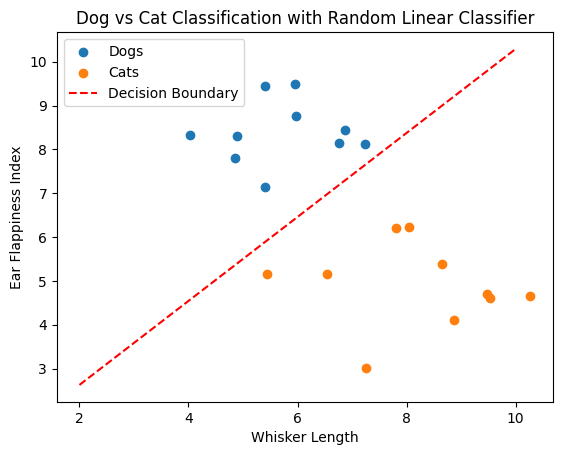

In [47]:
plt.scatter(dogs_whisker_length, dogs_ear_flappiness_index, label='Dogs')
plt.scatter(cats_whisker_length, cats_ear_flappiness_index, label='Cats')
plt.plot(x_vals, y_vals, color='red', linestyle='--', label='Decision Boundary')
plt.xlabel('Whisker Length')
plt.ylabel('Ear Flappiness Index')
plt.title('Dog vs Cat Classification with Random Linear Classifier')
plt.legend()
plt.show()